In [48]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [50]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers.core import Dense,Activation,Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib.image as processimage

In [51]:
#load MNIST dataset
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [52]:
#Prepare Data
#The full connected layer doesn't receive matrix, but only the vector
#so we need to prepare data
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000,28*28)

#X_train is all integers, because it is better to use decimals to converge, so it can be changed to decimals
#Use function "astype" to change integers into decimals
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')


#Normalization
#the total number of colors is 255
X_train = X_train/255  

#print(X_train)
#print(X_train[56])

X_test /=255

In [53]:
#Prepare basic seups

#batch_size decide how many pieces of data should be taken out of 60,000 pieces of data each time for training
#batch_size affects accuracy

batch_size = 1024

nb_class = 10 #How many classes to train
nb_epochs = 4 #Number of iterations

In [54]:
#class vectors[0，0，0，0，0，0，0，0，1，0]
print(Y_test.shape)
Y_test = np_utils.to_categorical(Y_test,nb_class)
Y_train = np_utils.to_categorical(Y_train,nb_class)

#print(Y_test[9999])
print(Y_test.shape)

(10000,)
(10000, 10)


In [55]:
#Set neural network structure
model = Sequential()

#1st layer
model.add(Dense(512,input_shape=(784,))) 
#input_dim = 784，
#(784,)is（784，1），represent there are 784 data in a row
model.add(Activation('relu'))
#Dropout some data from data to prevent from overfitting
model.add(Dropout(0.2))

#2nd layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3rd layer，the number of classification class is 10
model.add(Dense(10))
model.add(Activation('softmax'))

In [56]:
#Compile
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy'],
)

In [57]:
#Start training
Trainning = model.fit(
    X_train,Y_train,
    batch_size = batch_size,
    epochs=  nb_epochs,
    validation_data =(X_test,Y_test)
)

Epoch 1/4
59/59 [==============================] - 1s 9ms/step - loss: 0.5355 - accuracy: 0.8360 - val_loss: 0.3302 - val_accuracy: 0.8979
Epoch 2/4
59/59 [==============================] - 0s 7ms/step - loss: 0.2153 - accuracy: 0.9365 - val_loss: 0.1470 - val_accuracy: 0.9553
Epoch 3/4
59/59 [==============================] - 0s 6ms/step - loss: 0.1488 - accuracy: 0.9553 - val_loss: 0.1140 - val_accuracy: 0.9649
Epoch 4/4
59/59 [==============================] - 0s 6ms/step - loss: 0.1133 - accuracy: 0.9654 - val_loss: 0.1226 - val_accuracy: 0.9626


label:->> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(1, 784)


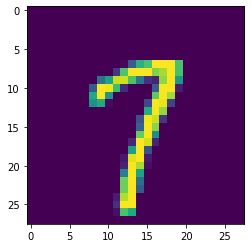

In [66]:
#Reshape and show the image in test
testrun = X_test[666].reshape(1,784)
testlabel = Y_test[666]
print('label:->>',testlabel)
print(testrun.shape)
plt.imshow(testrun.reshape([28,28]))

In [72]:
#Verify the result
pred = model.predict(testrun)
print('label of test sample Y_test[666]->>',testlabel)
print('Predicted result->>',pred)
#Find the index of maximum value
result = [i.argmax() for i in pred]
print('Predicted result is', result)

label of test sample Y_test[666]->> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Predicted result->> [[1.0998172e-05 1.9140377e-04 6.0716656e-04 4.5974643e-04 2.7705097e-05
  5.2866046e-05 6.1760181e-07 9.9774277e-01 5.1273939e-05 8.5547613e-04]]
Predicted result is [7]
